In [1]:
# conda activate lenet


Note: you may need to restart the kernel to use updated packages.


In [1]:
# conda env list

# conda environments:
#
base                     C:\ProgramData\Anaconda3
Card_detector            C:\ProgramData\Anaconda3\envs\Card_detector
Card_piece_Detector      C:\ProgramData\Anaconda3\envs\Card_piece_Detector
dogcat                   C:\ProgramData\Anaconda3\envs\dogcat
face_recognization       C:\ProgramData\Anaconda3\envs\face_recognization
scrapper_resume          C:\ProgramData\Anaconda3\envs\scrapper_resume
shreddermachine          C:\ProgramData\Anaconda3\envs\shreddermachine
tfod-maskrcnn            C:\ProgramData\Anaconda3\envs\tfod-maskrcnn
yolo5webapp              C:\ProgramData\Anaconda3\envs\yolo5webapp
yolo5webapp1             C:\ProgramData\Anaconda3\envs\yolo5webapp1
Deep_learning            C:\Users\thunderbolt\.conda\envs\Deep_learning
bboxtest                 C:\Users\thunderbolt\.conda\envs\bboxtest
demo1                    C:\Users\thunderbolt\.conda\envs\demo1
labelme                  C:\Users\thunderbolt\.conda\envs\labelme
lenet                 *  C:\Use

C:\ProgramData\Anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
C:\ProgramData\Anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
pip list

Package              VersionNote: you may need to restart the kernel to use updated packages.
-------------------- ---------
absl-py              0.14.1
argon2-cffi          21.1.0
astor                0.8.1
async-generator      1.10
attrs                21.2.0
backcall             0.2.0
bleach               4.1.0
cached-property      1.5.2
certifi              2021.5.30

cffi                 1.14.6
colorama             0.4.4
coverage             5.5
cycler               0.11.0
Cython               0.29.24
dataclasses          0.8
decorator            5.1.0
defusedxml           0.7.1
entrypoints          0.3
gast                 0.5.2
google-pasta         0.2.0
grpcio               1.41.0
importlib-metadata   4.8.1
ipykernel            5.5.6
ipython              7.16.1
ipython-genutils     0.2.0
ipywidgets           7.6.5
jedi                 0.18.0
Jinja2               3.0.2
jsonschema           3.2.0
jupyter              1.0.0
jupyter-client       7.0.6
jupyter-console      6.4.0
jup

In [2]:
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

Using TensorFlow backend.
C:\Users\thunderbolt\.conda\envs\lenet\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\thunderbolt\.conda\envs\lenet\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\thunderbolt\.conda\envs\lenet\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\thunderbolt\.conda\envs\lenet

In [9]:
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

# Loading the dataset and perform splitting
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Peforming reshaping operation
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalization
x_train = x_train / 255
x_test = x_test / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
# Building the Model Architecture

In [10]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=(28, 28,1)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(120, kernel_size=(5, 5), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 10, 10, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 1, 1, 120)         96120     
_________________________________________________________________
flatten_7 (Flatten)          (None, 120)              

In [11]:
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 329s 5ms/step - loss: 0.2962 - accuracy: 0.9111 - val_loss: 0.0698 - val_accuracy: 0.9779
Epoch 2/10
60000/60000 [==============================] - 359s 6ms/step - loss: 0.0677 - accuracy: 0.9800 - val_loss: 0.0477 - val_accuracy: 0.9855
Epoch 3/10
60000/60000 [==============================] - 345s 6ms/step - loss: 0.0460 - accuracy: 0.9863 - val_loss: 0.0335 - val_accuracy: 0.9900
Epoch 4/10
60000/60000 [==============================] - 279s 5ms/step - loss: 0.0352 - accuracy: 0.9895 - val_loss: 0.0303 - val_accuracy: 0.9909
Epoch 5/10
60000/60000 [==============================] - 337s 6ms/step - loss: 0.0283 - accuracy: 0.9913 - val_loss: 0.0302 - val_accuracy: 0.9908
Epoch 6/10
60000/60000 [==============================] - 353s 6ms/step - loss: 0.0238 - accuracy: 0.9925 - val_loss: 0.0322 - val_accuracy: 0.9901
Epoch 7/10
60000/60000 [==============================] - 280

In [12]:
print('x_train.shape')
print(x_train.shape)
print('')
print('x_test.shape')
print(x_test.shape)
print('')
print('y_train.shape')
print(y_train.shape)
print('')
print('y_test.shape')
print(y_test.shape)

x_train.shape
(60000, 28, 28, 1)

x_test.shape
(10000, 28, 28, 1)

y_train.shape
(60000, 10)

y_test.shape
(10000, 10)


In [ ]:
#pip install opencv-python

In [ ]:
#pip install Pillow

In [13]:
#  Using  open cv  and Pillow to  load the file 
import numpy
import cv2
from PIL import Image

img_pil = Image.open('C:/Users/thunderbolt/Downloads/image5.jpg')
print('Pillow: ', img_pil.mode, img_pil.size)

img_new = cv2.imread('C:/Users/thunderbolt/Downloads/image5.jpg', cv2.IMREAD_UNCHANGED)
print('OpenCV: ', img_new.shape)

Pillow:  RGB (2040, 2410)
OpenCV:  (2410, 2040, 3)


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

(-0.5, 2039.5, 2409.5, -0.5)

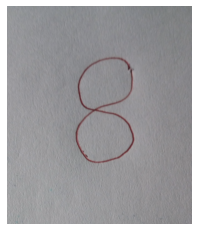

In [15]:
plt.imshow( img_new ,cmap = "binary")
plt.axis("off")

In [16]:
# loading the test image 
from PIL import Image
image = Image.open('C:/Users/thunderbolt/Downloads/image5.jpg')

In [17]:
# Checking size , format , mode of test image 

print(image.format) # Output: JPEG

# The pixel format used by the image. Typical values are "1", "L", "RGB", or "CMYK."
print(image.mode) # Output: RGB

# Image size, in pixels. The size is given as a 2-tuple (width, height).
print(image.size) # Output: (1920, 1280)

# Colour palette table, if any.
print(image.palette) # Output: None

JPEG
RGB
(2040, 2410)
None


In [18]:
# If we want  aspect ratio  to  be maintained while resizing  image 
#image.thumbnail((28, 28))
#image.save('image_thumbnail.jpg')

#print(image.size) # Output: (400, 267)


In [19]:
# Here we are resizing the test image to  the default training  image dimenstion
#image = Image.open('demo_image.jpg')
new_image = image.resize((28, 28))
new_image.save('image_28.jpg')

print(image.size) 
print(new_image.size)

(2040, 2410)
(28, 28)


In [20]:
# converting RGB image into  grey scale having  1 channel

greyscale_image = new_image.convert('L')
greyscale_image.save('greyscale_image.jpg')

print(new_image.mode) # Output: RGB
print(greyscale_image.mode) # Output: L


RGB
L


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

(-0.5, 27.5, 27.5, -0.5)

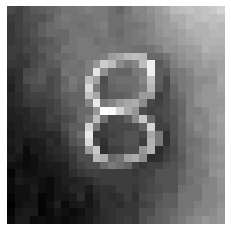

In [22]:
plt.imshow( greyscale_image ,cmap = "binary")
plt.axis("off")

(-0.5, 27.5, 27.5, -0.5)

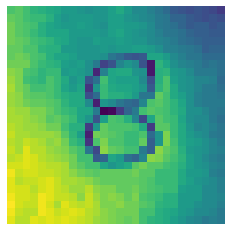

In [23]:
plt.imshow( greyscale_image )
plt.axis("off")

In [24]:
# Dimenstion of greyscale image 

print(greyscale_image.format) # Output: JPEG

# The pixel format used by the image. Typical values are "1", "L", "RGB", or "CMYK."
print(greyscale_image.mode) # Output: RGB

# Image size, in pixels. The size is given as a 2-tuple (width, height).
print(greyscale_image.size) # Output: (1920, 1280)

# Colour palette table, if any.
print(greyscale_image.palette) # Output: None

None
L
(28, 28)
None


In [25]:
# increasing the channel of the image to  match the training image here axix = -1 means adding  channel  to  the last
test_image = np.expand_dims(greyscale_image , axis=-1)

In [26]:
test_image.shape

(28, 28, 1)

In [27]:
# Increasing the channel  of the test  image ,  here axis =0  means adding  channel to the front 
test_image1 = np.expand_dims(test_image, axis = 0)

In [28]:
test_image1.shape

(1, 28, 28, 1)

In [29]:
# Normalizing the Test Image 
test_image2 = test_image1/ 255

In [30]:
test_image2.shape

(1, 28, 28, 1)

In [31]:
result = model.predict(test_image2)
result

array([[0.17840163, 0.02789551, 0.19828904, 0.19591694, 0.03961434,
        0.07674783, 0.10312935, 0.08905884, 0.0688483 , 0.02209828]],
      dtype=float32)

In [32]:
# Predicting  the number 
y_pred1 = np.argmax(result)
y_pred1

2